# Partie 3

### Définition de $\phi$

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

def phi(x, y, L):
    if x==0 or x==L:
        return 1
    if y==0 or y==L:
        return 0


### Simulation de la chaîne de Markov

In [83]:
def markov_edge(x,y,alpha,beta,L):
    gamma = (1-alpha-beta)
    fixe= [] #rassemble les branches qui ont déjà atteint le bord
    var = [[x,y]] #rassemble les branches qui évoluent toujours
    inter =[]
    while len(var)>0:
        inter=[]
        for branche in var:
            x = branche[0]
            y = branche[1]
            if x==0 or x==L or y==0 or y==L:
                fixe.append(branche)
            else:
                alea = random.random()
                if 0<=alea<=gamma:#evolution sur le réseaux
                    #print("normal")
                    if alea<=gamma/4:
                        branche = [x+1,y]
                    if gamma/4<=alea<=gamma/2:
                        branche = [x-1,y]
                    if gamma/2<=alea<=3*gamma/4:
                        branche = [x,y+1]
                    if 3*gamma/4<=alea<=gamma:
                        branche = [x,y-1]
                    
                    inter.append(branche)
                #if gamma<=alea<=gamma+alpha:#mort de la branche
                #    #print("mort")
                if gamma+alpha<=alea<=gamma+alpha+beta:#duplication
                    #print("duplication")
                    inter.append(branche)
                    inter.append(branche)
            var=[]
            for branche in inter:
                var.append(branche)
    prod = 1
    if len(fixe)==0:
        return 0
    else:
        for branche in fixe:
            prod = prod*phi(branche[0],branche[1],L)
        return prod

### Calcul de $u(x,y)$

In [89]:
def monte_carlo(x,y,alpha,beta,L,N):
    s= 0
    for n in range(N):
        s = s+ markov_edge(x,y,alpha,beta,L)
    return s/N

### Approximation de $f$

In [90]:
def approximate(alpha,beta,L,N):
    expected_values =np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            expected_values[i][j]=monte_carlo(i,j,alpha,beta,L,N)
    return expected_values

### Visualisation de $f$

In [93]:
def plot(alpha,beta,L,N):
    plt.imshow(approximate(alpha,beta,L, N).T, origin="lower",extent=[0, 1, 0, 1], cmap="jet")
    plt.show()

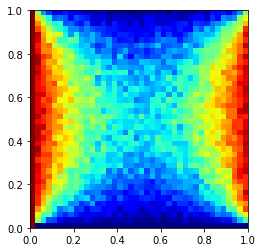

In [98]:
N =100
L = 40
alpha = 1/(L*L)
beta = alpha
plot(alpha,beta,L,N)